In [1]:
library(ggpubr)
Ranked_TF_list <- read.csv("./ALL_TFs_Ranked_List.csv")
Positive_TFs <- read.csv("./positive_TFs.csv")


Loading required package: ggplot2

Loading required package: magrittr



[1] 1599

[1] 1600

# Input1: Ranked TF list

In [5]:
head(Ranked_TF_list)
dim(Ranked_TF_list)

,TF,Rank,Freq
,<fct>,<int>,<int>
1,MYB85,1,1600
2,NST2,2,800
3,SND1,3,533
4,MYB63,4,400
5,MGP,5,320
6,MYB43,6,267


[1] 1600    3

# Input2: List of Positive TFs

In [4]:
head(Positive_TFs)
dim(Positive_TFs)

,positive_TFs
,<fct>
1,MYB85
2,NST2
3,SND1
4,MYB63
5,SND3
6,MYB43


[1] 18  1

In [7]:
TPRs <- c()
FPRs <- c()

for(cutoff in 1:dim(Ranked_TF_list)[1]){
    
    ALL_TFs <- unique(as.character(Ranked_TF_list$TF))
    P <- Positive_TFs$positive_TFs
    N <- setdiff(ALL_TFs,P)
    
    above_cut <- Ranked_TF_list[1:cutoff,]
    below_cut <- Ranked_TF_list[(cutoff+1):dim(Ranked_TF_list)[1],]
    
    TP<-intersect(above_cut$TF,P)
    TPR<-length(TP)/length(P)
    TPRs <- c(TPRs,TPR)
    
    
    TN<-intersect(N,below_cut$TF)
    FPR <- 1- (length(TN)/length(N))
    FPRs <- c(FPRs,FPR)
    
}

simple_auc <- function(TPR, FPR){
    dFPR <- c(diff(FPR), 0)
    dTPR <- c(diff(TPR), 0)
    sum(TPR * dFPR) + sum(dTPR * dFPR)/2
}

# Plot ROC curve

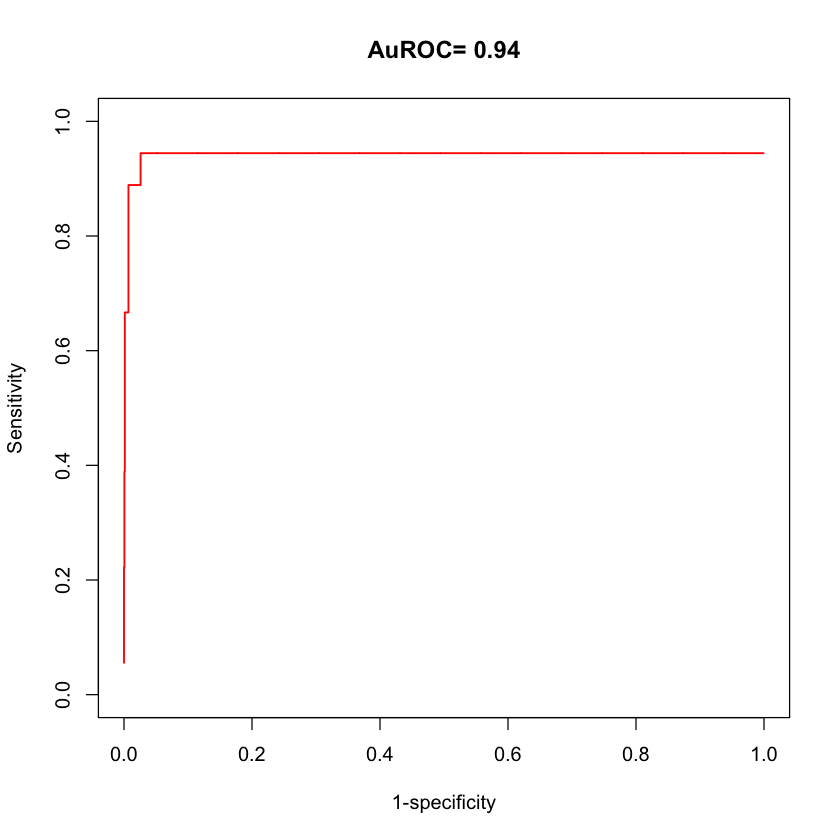

In [9]:
plot(main =paste("AuROC=",round(simple_auc(TPRs,FPRs),2),sep=" "),FPRs,TPRs,type = "l",col="red",lwd="1.5",xlab = "1-specificity",ylab="Sensitivity",xlim = c(0,1),ylim = c(0,1))